<a href="https://colab.research.google.com/github/FrancisKurian/CS670/blob/main/CS670_hw5_TF_IDF_term_frequency_inverse_document_frequency_IDF_vector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

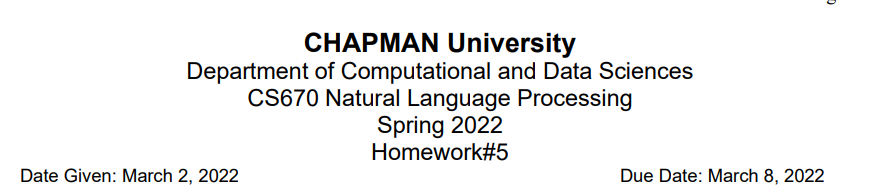

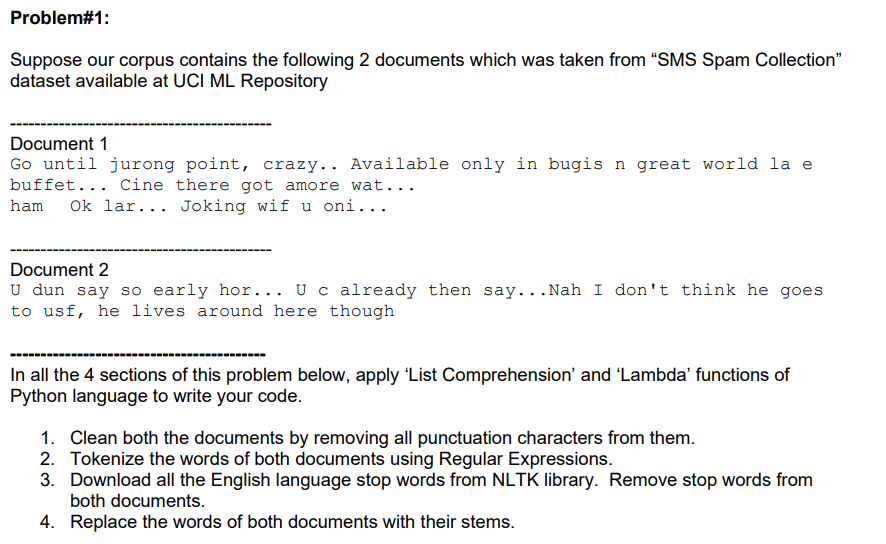

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SMSSpamCollection.txt to SMSSpamCollection.txt


In [ ]:
import pandas as pd
import string 
import re
import nltk
from nltk import PorterStemmer
nltk.download('stopwords')
stopwords= nltk.corpus.stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pd.set_option('display.max_colwidth',200)
# txt = open('SMSSpamCollection.txt').read().replace ('\t','\n')
# parsed_data=txt.split('\n')
# label_list=parsed_data[0::2]
# msg_list=parsed_data[1::2]
# df=pd.DataFrame({'label':label_list, 'msg':msg_list})

txt_1 = pd.read_csv('SMSSpamCollection.txt', sep='\t',header=None)
doc1=txt_1.iloc[0:2,1].to_string(index=False).replace("\n", "")
doc2=txt_1.iloc[3:5,1].to_string(index=False).replace("\n", "")
df2= pd.DataFrame([doc1,doc2], columns=['msg'])

In [ ]:
def remove_punctuation(txt):
  txt_nopunct="".join([c for c in txt if c not in string.punctuation])
  return txt_nopunct

## 1. Clean both the documents by removing all punctuation characters from them.

In [ ]:
df2['msg_clean']=df2['msg'].apply(lambda x: remove_punctuation(x))
df2

,msg,msg_clean
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok ...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat Ok lar Jokin...
1,"U dun say so early hor... U c already then say...Nah I don't think he goes to usf, he lives around here though",U dun say so early hor U c already then sayNah I dont think he goes to usf he lives around here though


## 2. Tokenize the words of both documents using Regular Expressions.

In [ ]:
def tokenize(txt):
  tokens =re.split('\W+',txt)
  return tokens

In [ ]:
df2['msg_clean_tokenized']=df2['msg_clean'].apply(lambda x: tokenize(x))
df2

,msg,msg_clean,msg_clean_tokenized
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok ...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat Ok lar Jokin...,"[Go, until, jurong, point, crazy, Available, only, in, bugis, n, great, world, la, e, buffet, Cine, there, got, amore, wat, Ok, lar, Joking, wif, u, oni]"
1,"U dun say so early hor... U c already then say...Nah I don't think he goes to usf, he lives around here though",U dun say so early hor U c already then sayNah I dont think he goes to usf he lives around here though,"[, U, dun, say, so, early, hor, U, c, already, then, sayNah, I, dont, think, he, goes, to, usf, he, lives, around, here, though]"


## 3. Download all the English language stop words from NLTK library. Remove stop words from both documents.


In [ ]:
def remove_stopwords(txt):
  txt_clean= [word for word in txt if word not in stopwords]
  return txt_clean

In [ ]:
df2['msg_no_StopWord']=df2['msg_clean_tokenized'].apply(lambda x: remove_stopwords(x))
df3=df2.get(['msg_clean_tokenized','msg_no_StopWord']) 
df3

,msg_clean_tokenized,msg_no_StopWord
0,"[Go, until, jurong, point, crazy, Available, only, in, bugis, n, great, world, la, e, buffet, Cine, there, got, amore, wat, Ok, lar, Joking, wif, u, oni]","[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat, Ok, lar, Joking, wif, u, oni]"
1,"[, U, dun, say, so, early, hor, U, c, already, then, sayNah, I, dont, think, he, goes, to, usf, he, lives, around, here, though]","[, U, dun, say, early, hor, U, c, already, sayNah, I, dont, think, goes, usf, lives, around, though]"


## 4. Replace the words of both documents with their stems.


In [ ]:
ps= PorterStemmer()
def stemming(txt):
  text=[ps.stem(word) for word in txt]
  return text

In [ ]:
df2['msg_stemmed']=df2['msg_no_StopWord'].apply(lambda x: stemming(x))
df3=df2.get(['msg_no_StopWord','msg_stemmed']) 
df3

,msg_no_StopWord,msg_stemmed
0,"[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat, Ok, lar, Joking, wif, u, oni]","[Go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat, Ok, lar, joke, wif, u, oni]"
1,"[, U, dun, say, early, hor, U, c, already, sayNah, I, dont, think, goes, usf, lives, around, though]","[, U, dun, say, earli, hor, U, c, alreadi, saynah, I, dont, think, goe, usf, live, around, though]"


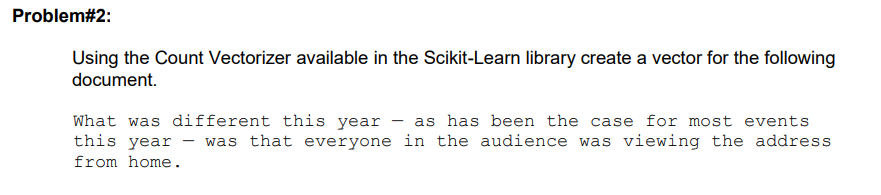

In [ ]:
doc3= ["What was different this year — as has been the case for most events this year — was that everyone in the audience was viewing the address from home."]

In [ ]:
df= pd.DataFrame(doc3, columns=['msg'])
df2=df.copy()
df['msg_clean']=df['msg'].apply(lambda x: remove_punctuation(x))
df['msg_clean_tokenized']=df['msg_clean'].apply(lambda x: tokenize(x))
df['msg_no_StopWord']=df['msg_clean_tokenized'].apply(lambda x: remove_stopwords(x))
df['msg_stemmed']=df['msg_no_StopWord'].apply(lambda x: stemming(x))
df

,msg,msg_clean,msg_clean_tokenized,msg_no_StopWord,msg_stemmed
0,What was different this year — as has been the case for most events this year — was that everyone in the audience was viewing the address from home.,What was different this year — as has been the case for most events this year — was that everyone in the audience was viewing the address from home,"[What, was, different, this, year, as, has, been, the, case, for, most, events, this, year, was, that, everyone, in, the, audience, was, viewing, the, address, from, home]","[What, different, year, case, events, year, everyone, audience, viewing, address, home]","[what, differ, year, case, event, year, everyon, audienc, view, address, home]"


In [ ]:
str=df['msg_stemmed'].to_string()
cv=CountVectorizer()
cv.fit([str])
vector = cv.transform([str])

## Vector for the given document

In [ ]:
d= pd.DataFrame([sorted(cv.vocabulary_)])
d.append(pd.DataFrame(vector.toarray())).T

,0,0
0,address,1
1,audienc,1
2,case,1
3,differ,1
4,event,1
5,everyon,1
6,home,1
7,view,1
8,what,1
9,year,2


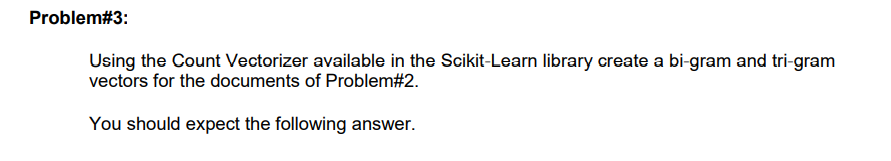

In [ ]:
def clean_text_ngram(txt):
  txt="".join([c for c in txt if c not in string.punctuation])
  tokens =re.split('\W+',txt)
  txt=" ".join([ps.stem(word) for word in tokens if word not in stopwords])
  return txt

In [ ]:
df2['msg_clean']=df2['msg'].apply(lambda x:clean_text_ngram(x))
df2

,msg,msg_clean
0,What was different this year — as has been the case for most events this year — was that everyone in the audience was viewing the address from home.,what differ year case event year everyon audienc view address home


##  bi-gram and tri-gram vectors 

In [ ]:
cv=CountVectorizer(ngram_range=(2,3))
X =cv.fit_transform(df2['msg_clean'])
print(X.shape)
df3= pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out()).T
df3

(1, 19)


,0
address home,1
audienc view,1
audienc view address,1
case event,1
case event year,1
differ year,1
differ year case,1
event year,1
event year everyon,1
everyon audienc,1


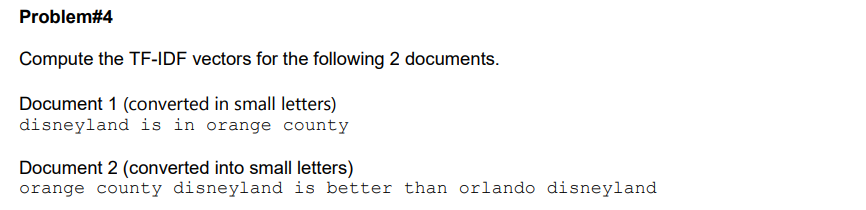

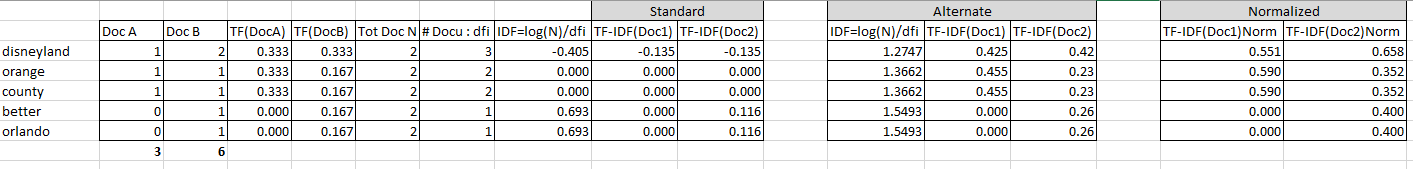

In [ ]:
doc =['disneyland orange county','orange county disneyland  better orlando disneyland']
vect = CountVectorizer()
X = vect.fit_transform(doc)
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)
print(tfidf.toarray().T)

[[0.         0.44554752]
 [0.57735027 0.31701073]
 [0.57735027 0.63402146]
 [0.57735027 0.31701073]
 [0.         0.44554752]]


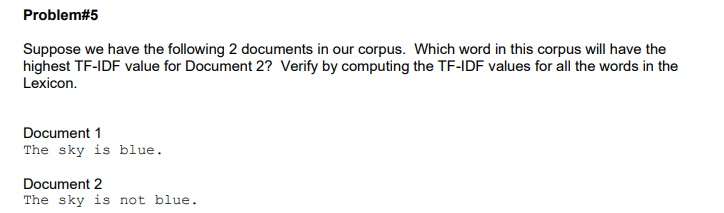

In [ ]:
corpus =["The sky is blue","The sky is not blue"]
vect = CountVectorizer(stop_words=["The","in","the","is","and"])
X=vect.fit_transform(corpus)

In [ ]:
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)
print(vect.get_feature_names_out())
print(tfidf.toarray().T)

['blue' 'not' 'sky']
[[0.70710678 0.50154891]
 [0.         0.70490949]
 [0.70710678 0.50154891]]


### TFIDF shows word NOT has the highest value in document 2